# Pattern Recognition
----
`Roll: CS20B1016, Name: V Nagasai`

----
## Assignment-2
----

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from string import *

## COMMON FUNCTION FOR QUESTION 1, 2, and 3

In [29]:
def discriminant_function(cls, prob_cls):
    c = np.array(cls).T
    dimension = c.shape[0]
#     print(dimension)
    
    #Calculating Mean
    mean = []
    for i in c:
        mean.append(np.mean(i))
#     print(mean)
    #Calculating Inverse of Covariance Matrix
    l = []
    for i in c:
        l.append(i)
    invcov = np.linalg.inv(np.cov(l))
#     print(invcov)
    x = []
    for i in range(dimension):
        if dimension<26:
            x.append(sp.symbols(chr(97+i)))
        else:
            x.append(sp.symbols(''.join(random.choices(ascii_uppercase, k=4))))
    A = list(np.subtract(x, mean))
    B = np.dot(list(np.transpose(A)), invcov)
    C = np.dot(B, A)
    G = ((-1/2) * C) - (dimension/2)*math.log(2*math.pi) - (0.5)*(math.log(abs(np.linalg.det(np.cov(l))))) + math.log(prob_cls)
    return(G)
   

## QUESTION 1

[1. 2. 3. 4. 5.]
Decision boundary is y = 2.00000000000000


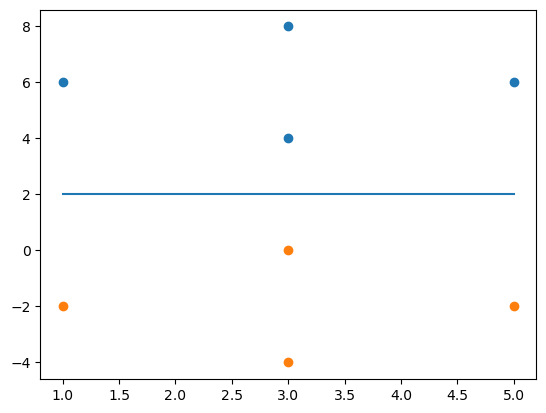

In [30]:
c1 = [(1,6), (3,4), (3,8), (5,6)]
c2 = [(3,0), (1,-2), (3,-4), (5,-2)]

g1 = discriminant_function(c1, 0.5)
g2 = discriminant_function(c2, 0.5)
g = sp.solve(g1-g2, dict=True)

t = [np.linspace(1,5,5)]
z = [i for i in g[0].values()]
T = []
for i in range(5):
    T.append(z[0])
print(t[0])
c1 = np.array(c1).T
c2 = np.array(c2).T
l1 = c1.tolist()
l2 = c2.tolist()
plt.scatter(l1[0], l1[1])
plt.scatter(l2[0], l2[1])
plt.plot(t[0], T)
print(f"Decision boundary is y = {z[0]}")

## QUESTION 2

Decision boundary is 0.0403475171612951 - 0.333333333333343*b


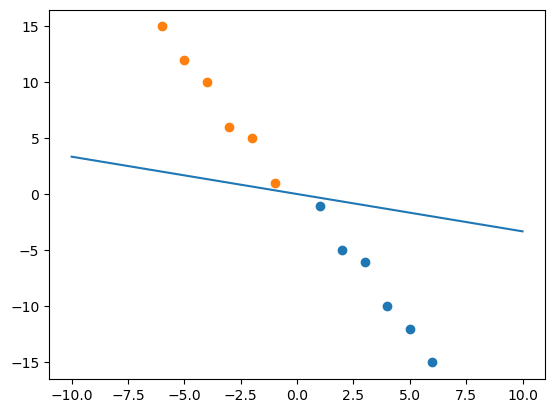

In [31]:
c3 = [(1,-1), (2,-5), (3,-6), (4,-10), (5,-12), (6,-15)]
c4 = [(-1,1), (-2,5), (-3,6), (-4,10), (-5,12), (-6,15)]

g3 = discriminant_function(c3, 0.3)
g4 = discriminant_function(c4, 0.7)
g = sp.solve(g3-g4)
z = g[0]
c3 = np.array(c3).T
c4 = np.array(c4).T
l3 = c3.tolist()
l4 = c4.tolist()
plt.scatter(l3[0], l3[1])
plt.scatter(l4[0], l4[1])
t = np.linspace(-10, 10, 10)
r = list(z.values())
var = r[0].free_symbols
x = 0
for i in var:
    x = i
lamexp = sp.lambdify(x,r[0])
output = lamexp(t)
plt.plot(t, output)
print(f"Decision boundary is {r[0]}")

## QUESTION 3

Decision boundary is 0.1875*a**2 - 1.125*a + 3.45645093981335


array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

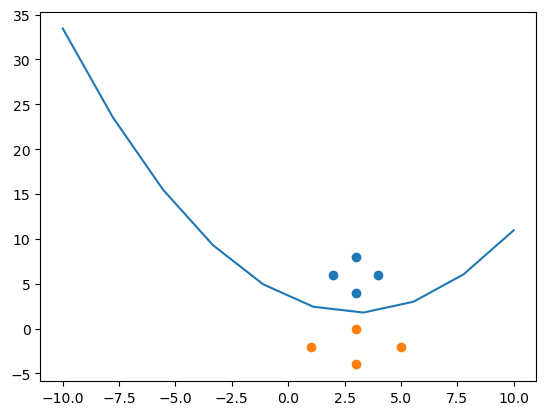

In [32]:
c5 = [(2,6),(3,4),(3,8),(4,6)]
c6 = [(3,0),(1,-2), (3,-4),(5,-2)]
g5 = discriminant_function(c5, 0.5)
g6 = discriminant_function(c6, 0.5)
g = sp.solve(g6-g5)
r = list(g[0].values())
var = r[0].free_symbols
x = 0
for i in var:
    x = i
lamexp = sp.lambdify(x,r[0])
output = lamexp(t)
c5 = np.array(c5).T
c6 = np.array(c6).T
l5 = c5.tolist()
l6 = c6.tolist()
plt.scatter(l5[0], l5[1])
plt.scatter(l6[0], l6[1])
plt.plot(t, output)
print(f"Decision boundary is {r[0]}")
t

In [33]:
import pandas as pd
import random

In [34]:
df = pd.read_csv("iris.csv")

class1 = df.loc[df["Species"] == "Iris-setosa"]
class2 = df.loc[df["Species"] == "Iris-virginica"]
class3 = df.loc[df["Species"] == "Iris-versicolor"]
cls1 = class1.iloc[0:40,1:5]
cls2 = class2.iloc[0:40,1:5]
cls3 = class3.iloc[0:40,1:5]

c1 = np.array(cls1)
c2 = np.array(cls2)
c3 = np.array(cls3)
s1 = []
s2 = []
s3 = []
for (i,j,k) in zip(c1, c2, c3):
    (x,y,z,w) = (i[0], i[1], i[2], i[3])
    (a,b,c,d) = (j[0], j[1], j[2], j[3])
    (p,q,r,u) = (k[0], k[1], k[2], k[3])
    s1.append((x,y,z,w))
    s2.append((a,b,c,d))
    s3.append((p,q,r,u))

g1 = discriminant_function(s1, 1/3)
g2 = discriminant_function(s2, 1/3)
g3 = discriminant_function(s3, 1/3)

test1 = np.array(class1.iloc[40:,1:5]).tolist()
test2 = np.array(class2.iloc[40:,1:5]).tolist()
test3 = np.array(class3.iloc[40:,1:5]).tolist()
t1 = [tuple(i) for i in test1]
t2 = [tuple(i) for i in test2]
t3 = [tuple(i) for i in test3]

var1 = g1.free_symbols
x1 = []
for i in var1:
    x1.append(i)

sahi = 0
for (i,j,k) in zip(t1,t2,t3):
    v11 = g1.subs([(x1[0],i[0]),(x1[1],i[1]),(x1[2],i[2]),(x1[3],i[3])])
    v12 = g2.subs([(x1[0],i[0]),(x1[1],i[1]),(x1[2],i[2]),(x1[3],i[3])])
    v13 = g3.subs([(x1[0],i[0]),(x1[1],i[1]),(x1[2],i[2]),(x1[3],i[3])])
    if(v11>v12 and v11>v13):
        sahi += 1
    
    v21 = g1.subs([(x1[0],j[0]),(x1[1],j[1]),(x1[2],j[2]),(x1[3],j[3])])
    v22 = g2.subs([(x1[0],j[0]),(x1[1],j[1]),(x1[2],j[2]),(x1[3],j[3])])
    v23 = g3.subs([(x1[0],j[0]),(x1[1],j[1]),(x1[2],j[2]),(x1[3],j[3])])
    if(v22>v21 and v22>v23):
        sahi += 1
        
    v31 = g1.subs([(x1[0],k[0]),(x1[1],k[1]),(x1[2],k[2]),(x1[3],k[3])])
    v32 = g2.subs([(x1[0],k[0]),(x1[1],k[1]),(x1[2],k[2]),(x1[3],k[3])])
    v33 = g3.subs([(x1[0],k[0]),(x1[1],k[1]),(x1[2],k[2]),(x1[3],k[3])])
    if(v33>v31 and v33>v32):
        sahi += 1

print(f"Accuracy = {(sahi*100)/30}%")

Accuracy = 66.66666666666667%


Accuracy = 100.0%


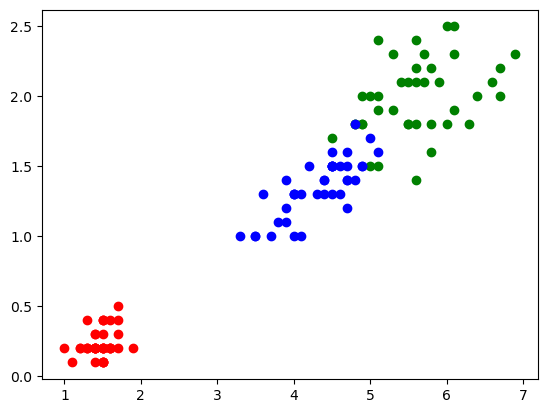

In [35]:
df = pd.read_csv("iris.csv")

class1 = df.loc[df["Species"] == "Iris-setosa"]
class2 = df.loc[df["Species"] == "Iris-virginica"]
class3 = df.loc[df["Species"] == "Iris-versicolor"]
cls1 = class1.iloc[0:40,3:5]
cls2 = class2.iloc[0:40,3:5]
cls3 = class3.iloc[0:40,3:5]

c1 = np.array(cls1)
c2 = np.array(cls2)
c3 = np.array(cls3)
s1 = []
s2 = []
s3 = []
for (i,j,k) in zip(c1, c2, c3):
    (x,y) = (i[0], i[1])
    (a,b) = (j[0], j[1])
    (p,q) = (k[0], k[1])
    s1.append((x,y))
    s2.append((a,b))
    s3.append((p,q))

g1 = discriminant_function(s1, 1/3)
g2 = discriminant_function(s2, 1/3)
g3 = discriminant_function(s3, 1/3)

test1 = np.array(class1.iloc[40:,3:5]).tolist()
test2 = np.array(class2.iloc[40:,3:5]).tolist()
test3 = np.array(class3.iloc[40:,3:5]).tolist()
t1 = [tuple(i) for i in test1]
t2 = [tuple(i) for i in test2]
t3 = [tuple(i) for i in test3]

var1 = g1.free_symbols
x1 = []
for i in var1:
    x1.append(i)

sahi = 0

for (i,j,k) in zip(t1,t2,t3):
    v11 = g1.subs([(x1[0],i[0]),(x1[1],i[1])])
    v12 = g2.subs([(x1[0],i[0]),(x1[1],i[1])])
    v13 = g3.subs([(x1[0],i[0]),(x1[1],i[1])])
    if(v11>v12 and v11>v13):
        sahi += 1
    
    v21 = g1.subs([(x1[0],j[0]),(x1[1],j[1])])
    v22 = g2.subs([(x1[0],j[0]),(x1[1],j[1])])
    v23 = g3.subs([(x1[0],j[0]),(x1[1],j[1])])
    if(v22>v21 and v22>v23):
        sahi += 1
    
    v31 = g1.subs([(x1[0],k[0]),(x1[1],k[1])])
    v32 = g2.subs([(x1[0],k[0]),(x1[1],k[1])])
    v33 = g3.subs([(x1[0],k[0]),(x1[1],k[1])])
    if(v33>v31 and v33>v32):
        sahi += 1

print(f"Accuracy = {(sahi*100)/30}%")
plt.scatter(c1.T[0],c1.T[1], color="red")
plt.scatter(c2.T[0],c2.T[1], color="green")
plt.scatter(c3.T[0],c3.T[1], color="blue")

## QUESTION 6

In [36]:
face = pd.read_csv("facedata.csv")
male = face.loc[face["class"] == "male"]
female = face.loc[face["class"] == "female"]

testmale = np.array(male.iloc[:395,1:])
testfemale = np.array(female.iloc[:395, 1:])
ml = [tuple(i) for i in testmale]
fl = [tuple(i) for i in testfemale]
# g1 = discriminant_function(ml, 0.5)
# g2 = discriminant_function(fl, 0.5)
np.linalg.det(np.array(female.cov()))

0.0